In [1]:
!pip install tbats

    100% |████████████████████████████████| 51kB 917kB/s ta 0:00:01


In [1]:
from tbats import BATS, TBATS

In [2]:
path='/home/rupeshr/Downloads/Store_one_Item_Demand.csv'
import pandas as pd
df = pd.read_csv(path)
#df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')
y = df['sales']
y_to_train = y.iloc[:(len(y)-365)]
y_to_test = y.iloc[(len(y)-365):] # last year for testing

In [3]:
y_to_train .count()

1461

In [4]:
estimator = TBATS(seasonal_periods=(7, 30))
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

In [ ]:
plt.plot()

In [4]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

In [5]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [6]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [7]:
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [8]:
df.count()

ds    108
y     108
dtype: int64

In [12]:
!pip install prophet

  Using cached https://files.pythonhosted.org/packages/f0/fa/c382f0ac5abe9f0a4df9d874a5e8843db035fe2f071b5c00a545b1e3c10b/prophet-1.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/08/b9/b4f0938b38dbe775c4def707f525ab816b9d0215ecd8ab2d76780f4514f8/cmdstanpy-0.9.68-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/17/4e/50e8e4cf5f00b537095711c2c86ac4d7191aed2b4fffd5a19f06898f6929/ujson-4.0.2-cp37-cp37m-manylinux1_x86_64.whl
  Stored in directory: /home/rupeshr/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [15]:
import pandas as pd
from prophet import Prophet

In [27]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [28]:
df.count()

ds    108
y     108
dtype: int64

In [29]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods=12,freq='MS')
future.tail()

,ds
115,1969-08-01
116,1969-09-01
117,1969-10-01
118,1969-11-01
119,1969-12-01


In [34]:
forecast = m.predict(future)

In [37]:
print(df.count(),forecast.count())

ds    108
y     108
dtype: int64 ds                            120
trend                         120
yhat_lower                    120
yhat_upper                    120
trend_lower                   120
trend_upper                   120
additive_terms                120
additive_terms_lower          120
additive_terms_upper          120
yearly                        120
yearly_lower                  120
yearly_upper                  120
multiplicative_terms          120
multiplicative_terms_lower    120
multiplicative_terms_upper    120
yhat                          120
dtype: int64


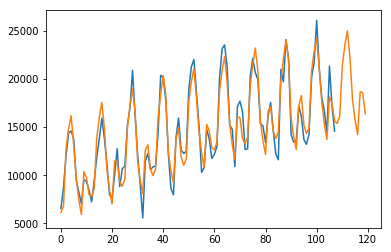

In [36]:
import matplotlib.pyplot as plt
plt.plot(df['y'])
plt.plot(forecast['yhat'])
plt.show()

In [38]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [42]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1
